Вы — аналитик крупного интернет-магазина. 
Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

# Описание данных:

__Файл hypothesis.csv:__

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

__Файл orders.csv:__
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

__Файл visitors.csv__
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

import seaborn as sns
sns.set(rc={'figure.figsize':(10, 8)})

import scipy.stats as stats
from scipy import stats as st

import math

import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
display(hypothesis.head())
display(hypothesis.info())
display(hypothesis.describe())
print('Количество дублей:', hypothesis.duplicated().sum())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Количество дублей: 0


In [4]:
display(orders.head())
display(orders.info())
display(orders.describe())
print('Количество дублей:', orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Количество дублей: 0


In [5]:
# сразу поменяем формат даты на корректный
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [6]:
display(visitors.head())
display(visitors.info())
display(visitors.describe())
print('Количество дублей:', visitors.duplicated().sum())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Количество дублей: 0


In [7]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [8]:
#посчитаем количество пользователей, которые попали в обе группы исследования
users = orders.groupby('visitorId')['group'].nunique().reset_index().sort_values('group', ascending=False)
users.query('group == 2').sort_values(by='visitorId').count()

visitorId    58
group        58
dtype: int64

In [9]:
#Т.к. пользователей, которые попали в обе группы не так много, по отношению
#ко всем, то лучше удалим их, чтобы не искажать результаты тестов
clean_users = orders.groupby(['visitorId', 'group', 'date', 'transactionId'], as_index=False)['revenue'].sum()
clean_users=clean_users.drop_duplicates(subset='visitorId',keep=False).reset_index()
clean_users

,index,visitorId,group,date,transactionId,revenue
0,0,5114589,B,2019-08-16,900025958,570
1,1,6958315,B,2019-08-04,1887336629,1490
2,4,11685486,A,2019-08-23,797272237,6201
3,5,39475350,B,2019-08-08,437876380,3990
4,6,47206413,B,2019-08-10,3778001764,730
...,...,...,...,...,...,...
932,1190,4259830713,A,2019-08-11,1266191879,3190
933,1193,4278982564,A,2019-08-05,51443164,24744
934,1194,4279090005,B,2019-08-04,2724331495,6716
935,1195,4281247801,B,2019-08-25,3796325351,2640


In [10]:
orders = clean_users
orders

,index,visitorId,group,date,transactionId,revenue
0,0,5114589,B,2019-08-16,900025958,570
1,1,6958315,B,2019-08-04,1887336629,1490
2,4,11685486,A,2019-08-23,797272237,6201
3,5,39475350,B,2019-08-08,437876380,3990
4,6,47206413,B,2019-08-10,3778001764,730
...,...,...,...,...,...,...
932,1190,4259830713,A,2019-08-11,1266191879,3190
933,1193,4278982564,A,2019-08-05,51443164,24744
934,1194,4279090005,B,2019-08-04,2724331495,6716
935,1195,4281247801,B,2019-08-25,3796325351,2640


Вывод: Данные загружены и подготовлены. Проблем почти не было, пара преобразований типов данных. Так же было выявлено 58 пользователей, которые попали в обе группы, мы их удалили.

__Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.__

In [11]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('ICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000


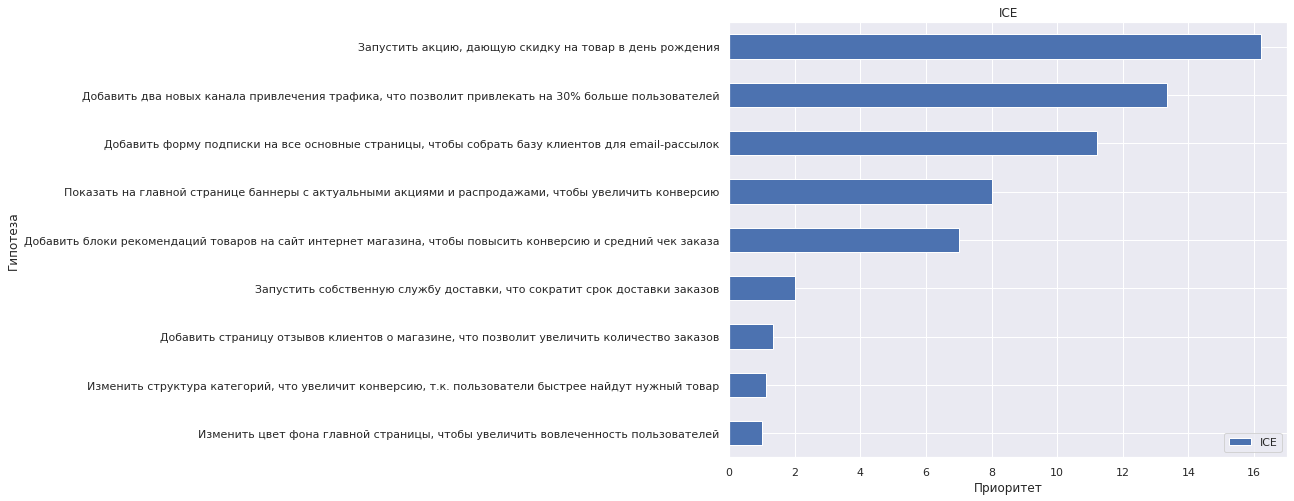

In [12]:
ax = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

По ICE приоритет на стороне 
- "Запустить акцию, дающую скидку на товар в день рождения"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

__Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета__

In [13]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis.sort_values('RICE', ascending=False).head()

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


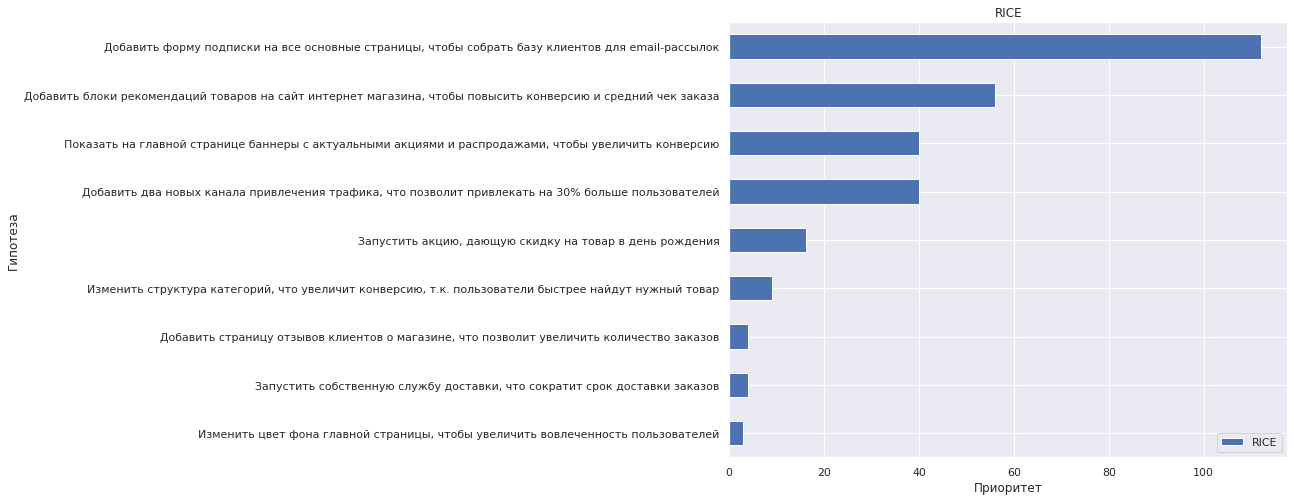

In [14]:
ax = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
ax.set_xlabel('Приоритет')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

__Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.__

__Вывод:__По RICE в топ-3 попадают:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"


Не удивительно, что гипотеза под номером 8("Запустить акцию, дающую скидку на товар в день рождения") так сильно опустилась, ведь её охват равен 1.

___

# Часть 2. Анализ A/B-теста.

__Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.__

In [15]:
#Приведём название столбцов к нижнему регистру
orders.rename(columns={'transactionId':'transactionid', 'visitorId':'visitorid'}, inplace=True)
#Приведём даты в порядок
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [17]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transactionid':'nunique','visitorid':'nunique','revenue':'sum'}))\
                        .rename(columns={'transactionid':'orders','visitorid':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

In [18]:
# посчитаем сумму визитов по дням в каждой группе
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
# скопируем group чтобы провести по ней кумулятивную сумму
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

In [19]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])

In [20]:
cummulative['average_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [21]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,average_check,conversion
0,2019-08-01,A,15,15,89858,719,5990.533333,0.020862
1,2019-08-01,B,17,17,59758,713,3515.176471,0.023843
2,2019-08-02,A,30,30,136341,1338,4544.700000,0.022422
3,2019-08-02,B,37,37,213431,1294,5768.405405,0.028594
4,2019-08-03,A,54,54,248814,1845,4607.666667,0.029268


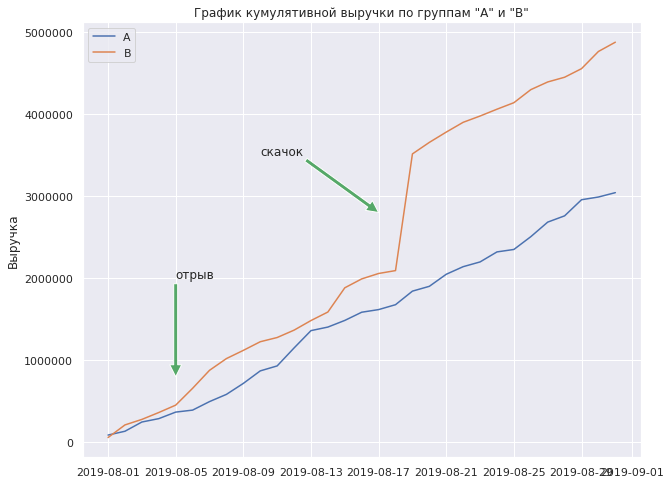

In [22]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.title('График кумулятивной выручки по группам "A" и "B"')
plt.ylabel("Выручка")
plt.legend()
plt.show()

__Вывод:__
Оба графика растут линейно, однако у группы "В" наблюдается резкий скачок. Вполне вероятно, что это выброс.

__Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.__

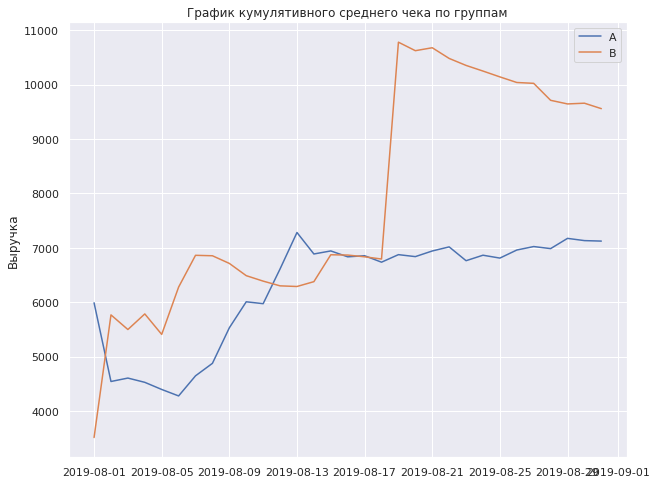

In [23]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'average_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'average_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.legend()
plt.show()

__Вывод:__
Опять-таки в тот же период в группе "В" наблюдается резкий скачок.

__Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.__

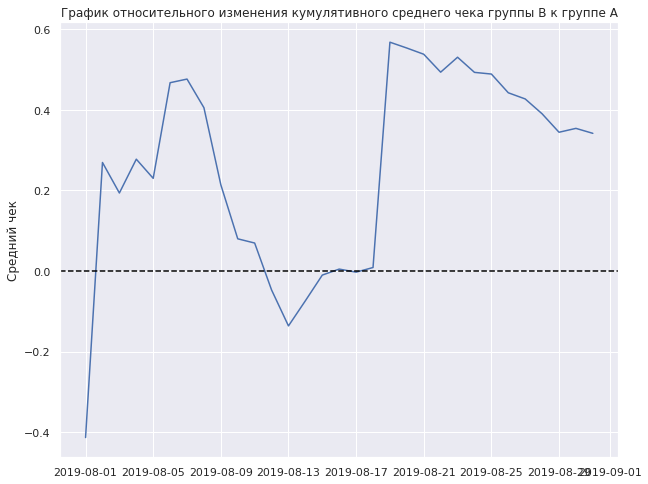

In [24]:
CumulativeRevenue  = (cummulativeA[['date', 'average_check']].merge(cummulativeB[['date', 'average_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(CumulativeRevenue['date'], CumulativeRevenue['average_check_B'] / CumulativeRevenue['average_check_A']-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.ylabel("Средний чек")
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

__Вывод:__ В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы

__Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.__

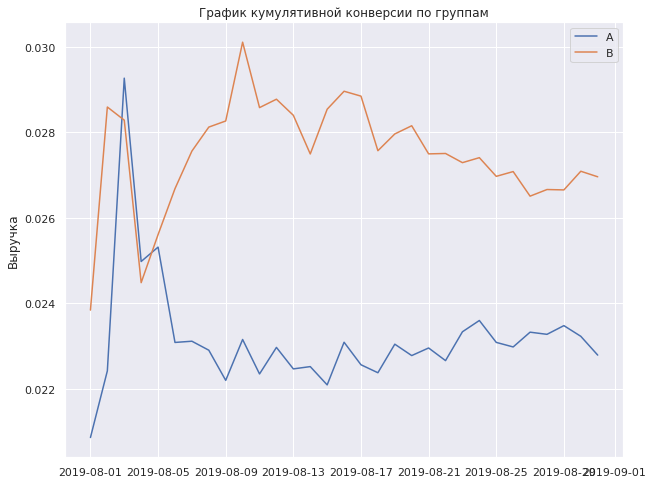

In [25]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной конверсии по группам')
plt.ylabel("Выручка")
plt.legend()
plt.show()

__Вывод:__
У группы А конверсия наблюдается в пределах 0.029 - 0.031. У группы "В" конверсия выглядит немного лучше, она колеблется в пределах 0.033-0.035.

__Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.__

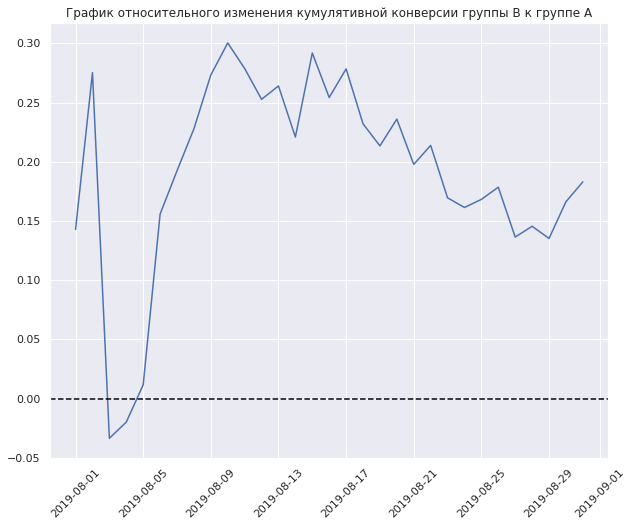

In [26]:
CumulativeConversion = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(CumulativeConversion['date'], CumulativeConversion['conversion_B'] / CumulativeConversion['conversion_A']-1)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show()

__Вывод:__ Однозначно, конверсия группы "В" лучше, чем А.

__Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.__

In [27]:
orders_per_user = orders.groupby('visitorid', as_index=False).agg({'transactionid':'nunique'})\
                         .rename(columns={'transactionid':'orders'})
orders_per_user.head()

,visitorid,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


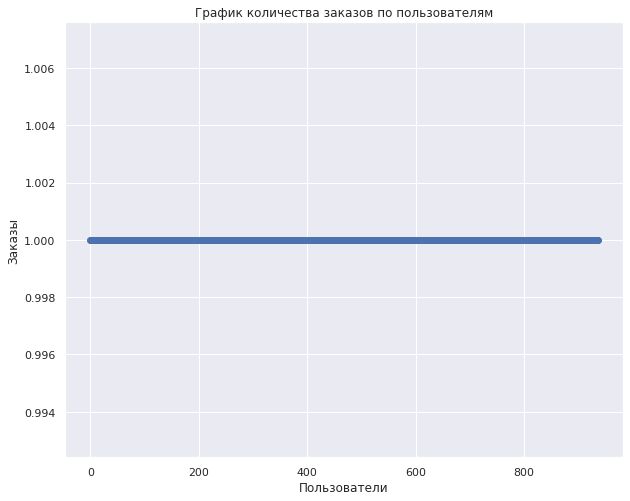

In [28]:
x_values = pd.Series(range(0,len(orders_per_user['orders'])))
plt.scatter(x_values, orders_per_user['orders'])
plt.title('График количества заказов по пользователям')
plt.ylabel("Заказы")
plt.xlabel("Пользователи")
plt.show()

__Вывод:__ Зачастую пользователи совершают 1 покупку, однако и наблюдается люди, которые приобретают 10+ раз.

__Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.__

In [29]:
print('90 перцентиль: %.0f' % (np.percentile(orders_per_user['orders'], [90])))
print('95 перцентиль: %.0f' % (np.percentile(orders_per_user['orders'], [95])))
print('99 перцентиль: %.0f' % (np.percentile(orders_per_user['orders'], [99])))
orders_per_99 = np.percentile(orders_per_user['orders'], [99])[0]

90 перцентиль: 1
95 перцентиль: 1
99 перцентиль: 1


In [30]:
print('Максимальное количество пользователей:', orders_per_user['orders'].max())

Максимальное количество пользователей: 1


__Вывод:__ Однозначно можно сказать только одно - всё, что находится за 99 перцентилем аномально.

__Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.__

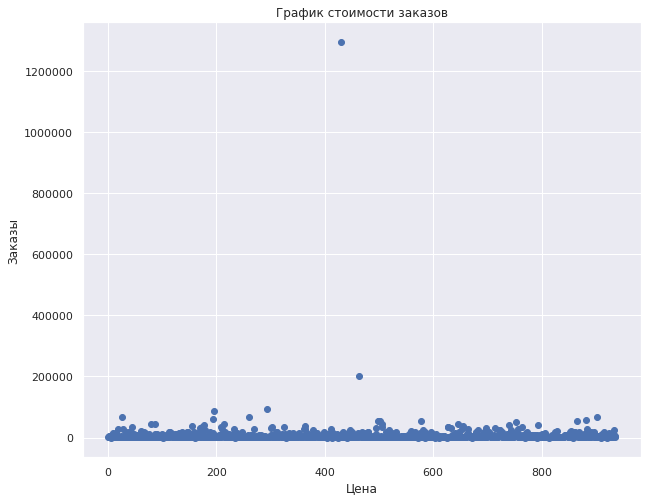

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимости заказов')
plt.ylabel("Заказы")
plt.xlabel("Цена")
plt.show()

__Вывод:__ Исходя из этого графика мы можем увидеть 2 выброса.

__Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.__

In [32]:
print('90 перцентиль: %.2f' % (np.percentile(orders['revenue'], [90])))
print('95 перцентиль: %.2f' % (np.percentile(orders['revenue'], [95])))
print('99 перцентиль: %.2f' % (np.percentile(orders['revenue'], [99])))
revenue_per_99 = np.percentile(orders['revenue'], [99])[0]

90 перцентиль: 17990.00
95 перцентиль: 28000.00
99 перцентиль: 53904.00


In [33]:
print('Максимальная стоимость заказа:', orders['revenue'].max())

Максимальная стоимость заказа: 1294500


__Вывод:__ Однозначно можно сказать только одно - всё, что находится за 99 перцентилем аномально.

__Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.__

- Для проверки будем использовать непараметрический критерий Манна-Уитни, так как с большой долей вероятности можно утверждать что данные у нас распределены ненормально.

In [34]:
# таблицы с данными по заказам на каждого пользователя
orders_by_usersA = orders[orders['group']=='A'].groupby('visitorid')['transactionid'].nunique().reset_index()
orders_by_usersA.columns=['visitorsid','orders']

orders_by_usersB = orders[orders['group']=='B'].groupby('visitorid')['transactionid'].nunique().reset_index()
orders_by_usersB.columns=['visitorsid','orders']

In [35]:
freeloadersA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_usersA['orders'])), name='orders')
freeloadersB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_usersB['orders'])), name='orders')

In [36]:
# создаем выборки с сырыми данными для стат тестов
sampleA = pd.concat([orders_by_usersA['orders'], freeloadersA])
sampleB = pd.concat([orders_by_usersB['orders'], freeloadersB])

In [37]:
#H0 - конверсия группы А = конверсии группы В
#H1 - конверсии групп не равны
#Примем для себя уровень значимости alpha = .05
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB)[1]))
print('Средняя конверсия группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия группы B: {:.1%}'.format(sampleB.mean()))

p_value: 0.00469
Средняя конверсия группы А: 2.3%
Средняя конверсия группы B: 2.7%


__Вывод:__ Так как p_value меньше заданного значения alpha, то мы отвергаем гипотизу о равенстве средний конверсий

__Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.__

In [38]:
#H0 - средний чек группы А = чеку группы В
#H1 - средний чек групп не равен
#Примем для себя уровень значимости alpha = .05
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
))
print('Средний чек группы А: {:.2f}'.format(orders[orders['group']=='A']['revenue'].mean()))
print('Средний чек группы B: {:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()))

p_value: 0.44482
Средний чек группы А: 7124.20
Средний чек группы B: 9557.53


__Вывод:__ Несмотря на разницу среднего чека в 2000, тест показывает, что мы не можем отвергнуть нулевую гипотезу о равенстве средних. То есть, такое различие не статистически значимо.

__Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.__

In [39]:
#Сформируем "очищенную" таблицу
orders_clean = orders.query('revenue<= @revenue_per_99')
orders_clean_users = orders_per_user.query('orders<= @orders_per_99')
orders_clean = orders_clean.loc[orders_clean['visitorid'].isin(orders_clean_users['visitorid'])]

In [40]:
orders_by_usersA = orders_clean[orders_clean['group']=='A'].groupby('visitorid')['transactionid'].nunique().reset_index()
orders_by_usersA.columns=['visitorsid','orders']

orders_by_usersB = orders_clean[orders_clean['group']=='B'].groupby('visitorid')['transactionid'].nunique().reset_index()
orders_by_usersB.columns=['visitorsid','orders']

In [41]:
freeloadersA = pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - len(orders_by_usersA['orders'])), name='orders')
freeloadersB = pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - len(orders_by_usersB['orders'])), name='orders')

In [42]:
# создаем выборки с чистыми данными для стат тестов
sampleA = pd.concat([orders_by_usersA['orders'], freeloadersA])
sampleB = pd.concat([orders_by_usersB['orders'], freeloadersB])

In [43]:
#H0 - конверсия группы А = конверсии группы В
#H1 - конверсии групп не равны
#Примем для себя уровень значимости alpha = .05
print('p_value: {:.5f}'.format(st.mannwhitneyu(sampleA, sampleB,True, 'two-sided')[1]))
print('Средняя конверсия (очищенная) группы А: {:.1%}'.format(sampleA.mean()))
print('Средняя конверсия (очищенная) группы B: {:.1%}'.format(sampleB.mean()))

p_value: 0.00818
Средняя конверсия (очищенная) группы А: 2.3%
Средняя конверсия (очищенная) группы B: 2.7%


На очищенных данных ситуация с конверсией почти не изменилась, только конверсия немного уменьшилась. Группа В, по прежнему, в лидерах по конверсии. Отвергаем H0 о равенстве конверсий.

__Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.__

In [44]:
print('p_value: {:.5f}'.format(
    st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'], True, 'two-sided')[1]
))
print('Средний чек (очищенный) группы А: {:.2f}'.format(orders_clean[orders_clean['group']=='A']['revenue'].mean()))
print('Средний чек (очищенный) группы B: {:.2f}'.format(orders_clean[orders_clean['group']=='B']['revenue'].mean()))

p_value: 0.96949
Средний чек (очищенный) группы А: 6372.00
Средний чек (очищенный) группы B: 6387.22


Такая же ситуация с тестом и по среднему чеку, мы по прежнему не можем отвергнуть нулевую гипотезу о равенстве среднего чека. Однако, средние чеки значительно выровнялись, больше нет такой большой разницы между группа А и В по среднему чеку.

plt.title('График количества заказов по пользователям')
plt.ylabel("Заказы")
plt.xlabel("Пользователи")

In [45]:
dates_groups = orders[['date','group']].drop_duplicates()
orders_aggregated = (dates_groups
                     .apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date']
                                                            , orders_clean['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'revenue':'sum', 'transactionid':'nunique'}), axis=1) 
                    .sort_values(by=['date','group']))
                    
orders_aggregated.rename(columns={'transactionid':'orders_clean'}, inplace=True)

visitors_aggregated = (dates_groups
                     .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date']
                                                            , visitors['group'] ==  x['group'])]
                    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1) 
                    .sort_values(by=['date','group']))
visitors_aggregated.head()

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date','group'])
cumulative_data.head()



register_matplotlib_converters()
# Построим график кумулятивной выручки по группам, предварительно изучив количество заказов в каждой из групп
cumulative_a = cumulative_data.loc[cumulative_data['group'] == 'A',['date','revenue','orders_clean','visitors']]
cumulative_b = cumulative_data.loc[cumulative_data['group'] == 'B',['date','revenue','orders_clean','visitors']]

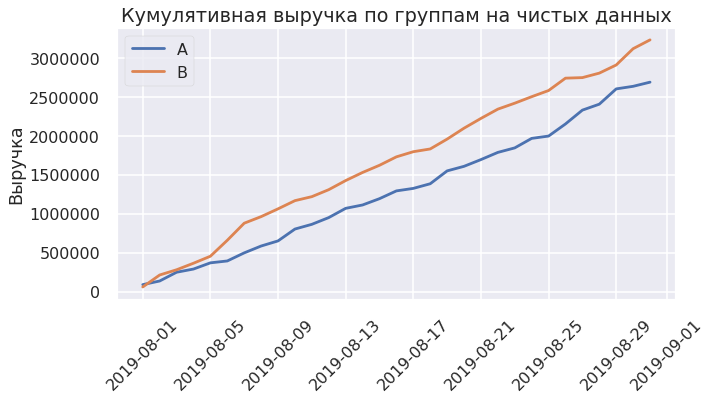

In [46]:
plt.style.use('seaborn-poster')
plt.figure(figsize=(10, 5))
plt.plot(cumulative_a['date'], cumulative_a['revenue'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'], label='B')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам на чистых данных')
plt.legend(loc='best');

# Вывод
Данные были загружены и подготовлены. Предобработки данных не понадобилось, лишь пара преобразований типов данных. Так же было выявлено 58 пользователей, которые попали в обе группы, мы их удалили. Оба графика кумулятивной вырочки расли линейно, однако у группы "В" наблюдается резкий скачок, это за 99 перцентилем - выброс.

По ICE приоритет на стороне
- "Запустить акцию, дающую скидку на товар в день рождения"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


По RICE в топ-3 попадают:
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

__Хуже всего себя проявила гипотеза под номером 8("Запустить акцию, дающую скидку на товар в день рождения") так сильно опустилась, ведь её охват равен 1.__

По результатам проведенного анализа, на чистых данных, была выявлена стат значимость в конверсих двух групп, конверсия в группе В выше. И на графике выше, хоть он и на грязных данных, мы видим что конверсия группы В зафиксировалась примерно на одном уровне.

В среднем чеке групп не было найден стат значимых различий. Хоть и у группы В он немного меньше.

Учитывая что конверсия группы В больше чем у группы А и больший размер куммулитивной выручки, принимаем решение остановить тест и зафиксировать победу группы В.